# Домашнее задание 2
## Анализ данных в Python (Социология)
### Темы: предобработка данных для модели, линейная регрессия, регуляризация, оптимизация гиперпараметров, классификация и логистическая регрессия, SGD

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Если вопрос задается конкретно, то предполагается, что вы дадите комментарии. Не забывайте комментировать код, чтобы было понятно, что вы делаете.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

⚠️ Данное домашнее задание является облегченной версией домашнего задания, которое дается на курсе [Машинное обучение](https://github.com/Murcha1990/ML_AI24) на программе "Искусственный интеллект". Права на изменение и применение получены. Исходник домашнего задания (base и pro) сочетает самые разные прикладные стороны обучения моделей и рекомендуется каждому к изучению. 

Всего можно набрать 24,5 балла. В пересчете на 10 балльную систему - это 10 баллов.

**Дедлайн:** до 09:00 (утра) 08.12.2025

**Формат сдачи:** файл ipynb, название файла должно быть в виде: Фамилия_БСЦ_Группа_HW2.ipynb. За неправильно названный файл полагается штраф. Сдача ДЗ ассистенту в личку Telegram: @snovasash 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
# завел также библиотеку для игнорирования предупреждений, чтобы удобнее было читать выводы
import warnings
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

Для воспроизводимости результатов. При фиксированном сиде все операции где есть та или иная операция рандомизации будут давать одинаковый результат при каждом запуске кода, те это позволяет проверять корректность решения и воспроизводить эксперименты, чтобы тот кто будет проверять получил те же результаты на запуске. Так же это будет работать и при совместной разработке с коллегами, ты отправляешь файл, а у них будет тот же результат который они могут отревьюить и дать обратную связь о корректности/некорректности применения того или иного алгоритма

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ


## **Простейший EDA и обработка признаков (4.5 балла)**

In [2]:
# это скипает проверку ссл сертификатов. Раскомментируйте, если запускаете локально или на ненастроенном окружении
# import ssl
# import urllib.request
# ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (1.65 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


Тут лучше раскидаю ответы по отдельным ячейкам

In [4]:
# your code here
# 10 случайных строк
print(df_train.sample(10))

                                        name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   

In [5]:
# голова и хвост теста
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


Думаю, что по условию предполагается посмотреть пропуски во всех датасетах

In [7]:
# работа с пропусками
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [8]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Итого, видим, что пропуски есть в переменных 'mileage', 'engine', 'max_power', 'torque', 'seats'. Далее смотрим явные дубли для двух датасетов.

In [9]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

985
62


Итого, видим, что у нас есть 985 явных дублей в трейн датасете и 62 в тест датасете


### **Задание 2 (0.75 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [10]:
# смотрим типы данных для датасетов
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [11]:
# смотрим типы данных для датасетов
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


Я хочу сделать эти три задания один раз пройдясь по датасетам циклом. Мы регуляркой [^\d\.] найдем все символы которые не являются цифрами или точкой следовательно уберем все текстовые описания в измерениях. Потом с помощью astype приведем данные к float формату. torque также удалим в цикле для двух датасетов

In [12]:
# your code here
for df in [df_train, df_test]:
    df['mileage'] = df['mileage'].str.replace(r'[^\d\.]', '', regex=True).astype(float)
    df['engine'] = df['engine'].str.replace(r'[^\d\.]', '', regex=True).astype(float)
    df['max_power'] = df['max_power'].str.replace(r'[^\d\.]', '', regex=True)
    df['max_power'] = df['max_power'].replace('', np.nan).astype(float)
    df.drop('torque', axis=1, inplace=True)

Проверим корректность скрипта

In [13]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0


In [14]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,5.0


Видим, что скрипт отработал корректно

В предыдущем задании мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

Также пройдемся циклом по всем нужным нам колонкам и заменим пропуски на медианы. Также inplace = True значит, что мы меняем исходный датафрейм не создавая новый

In [15]:
# your code here
for col in ['mileage', 'engine', 'max_power', 'seats']:
    median_val = df_train[col].median()
    df_train[col].fillna(median_val, inplace=True)
    df_test[col].fillna(median_val, inplace=True)


Проверим как отработал скрипт

In [16]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [17]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

### **Задание 3 (0.3 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

Всё также проходимся циклом)

In [18]:
# your code here
for df in [df_train, df_test]:
    df['engine'] = df['engine'].astype(int)
    df['seats'] = df['seats'].astype(int)

проверим, что ничего не сломали на одном датафрейме например на тестовом

In [19]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498,112.0,7
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497,108.5,5
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799,130.0,5
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498,98.6,5
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172,65.0,5


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   int64  
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


Отлично, значениия как на схеме, так и на выводе в типе инт

### **Задание 4 (1.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


Дропаем цену продажи как целевую переменную и также считаем дубли уже всем известной комбинацией

In [21]:
feature_cols = df_train.columns.drop('selling_price')
duplicates_count = df_train.duplicated(subset=feature_cols).sum()
print(duplicates_count)

1159


как видим их достаточно много

In [22]:
duplicate_rows = df_train[df_train.duplicated(subset=feature_cols, keep=False)]
display(duplicate_rows.sort_values(by=list(feature_cols)))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968,174.33,5
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968,174.33,5
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22,2967,241.40,5
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22,2967,241.40,5
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968,188.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5637,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969,190.00,5
5652,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969,190.00,5
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969,190.00,5
5991,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969,190.00,5


Удалим повторяющиеся, в условии явно намекнули, что надо сделать keep='first

In [23]:
df_train = df_train.drop_duplicates(subset=feature_cols, keep='first')

In [24]:
df_train = df_train.reset_index(drop=True)

In [25]:
# Проверка того, что все сделали правильно

assert df_train.shape == (5840, 12), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

Отлично, проверка прошла

### **Задание 5 (0.3 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

Спасибо за примечание. Мы посмотрим статистики сначала для числовых затем для категориальных переменных

In [26]:
# для трейна
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [27]:
# для теста
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


теперь для категориальных

In [28]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [29]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


Итак, мы видим, что распределения в трейне и тесте схожи по основным статистикам (средние и квантили) это свидетельствует о том, что данные собраны относительно (оч важно, тк мы не знаем как их семплировали, набирали, отражает ли ген совокупность и тд + возможно есть дисбаланс с точки зрения наполенения, тут его не просят проверять) хорошо, поэтому доп действий делать не будем, все индикаторы +- естественные как годам, так и по пробегу. Для категориальных переменных в обеих выборках преобладают автомобили с дизельным двигателем, ручной коробкой передач и одним владельцем, а также преимущественно проданные частными лицами.

In [30]:
# your code here

## **Визуализации (3 балла)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (1.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

Строим pairplot для трейна

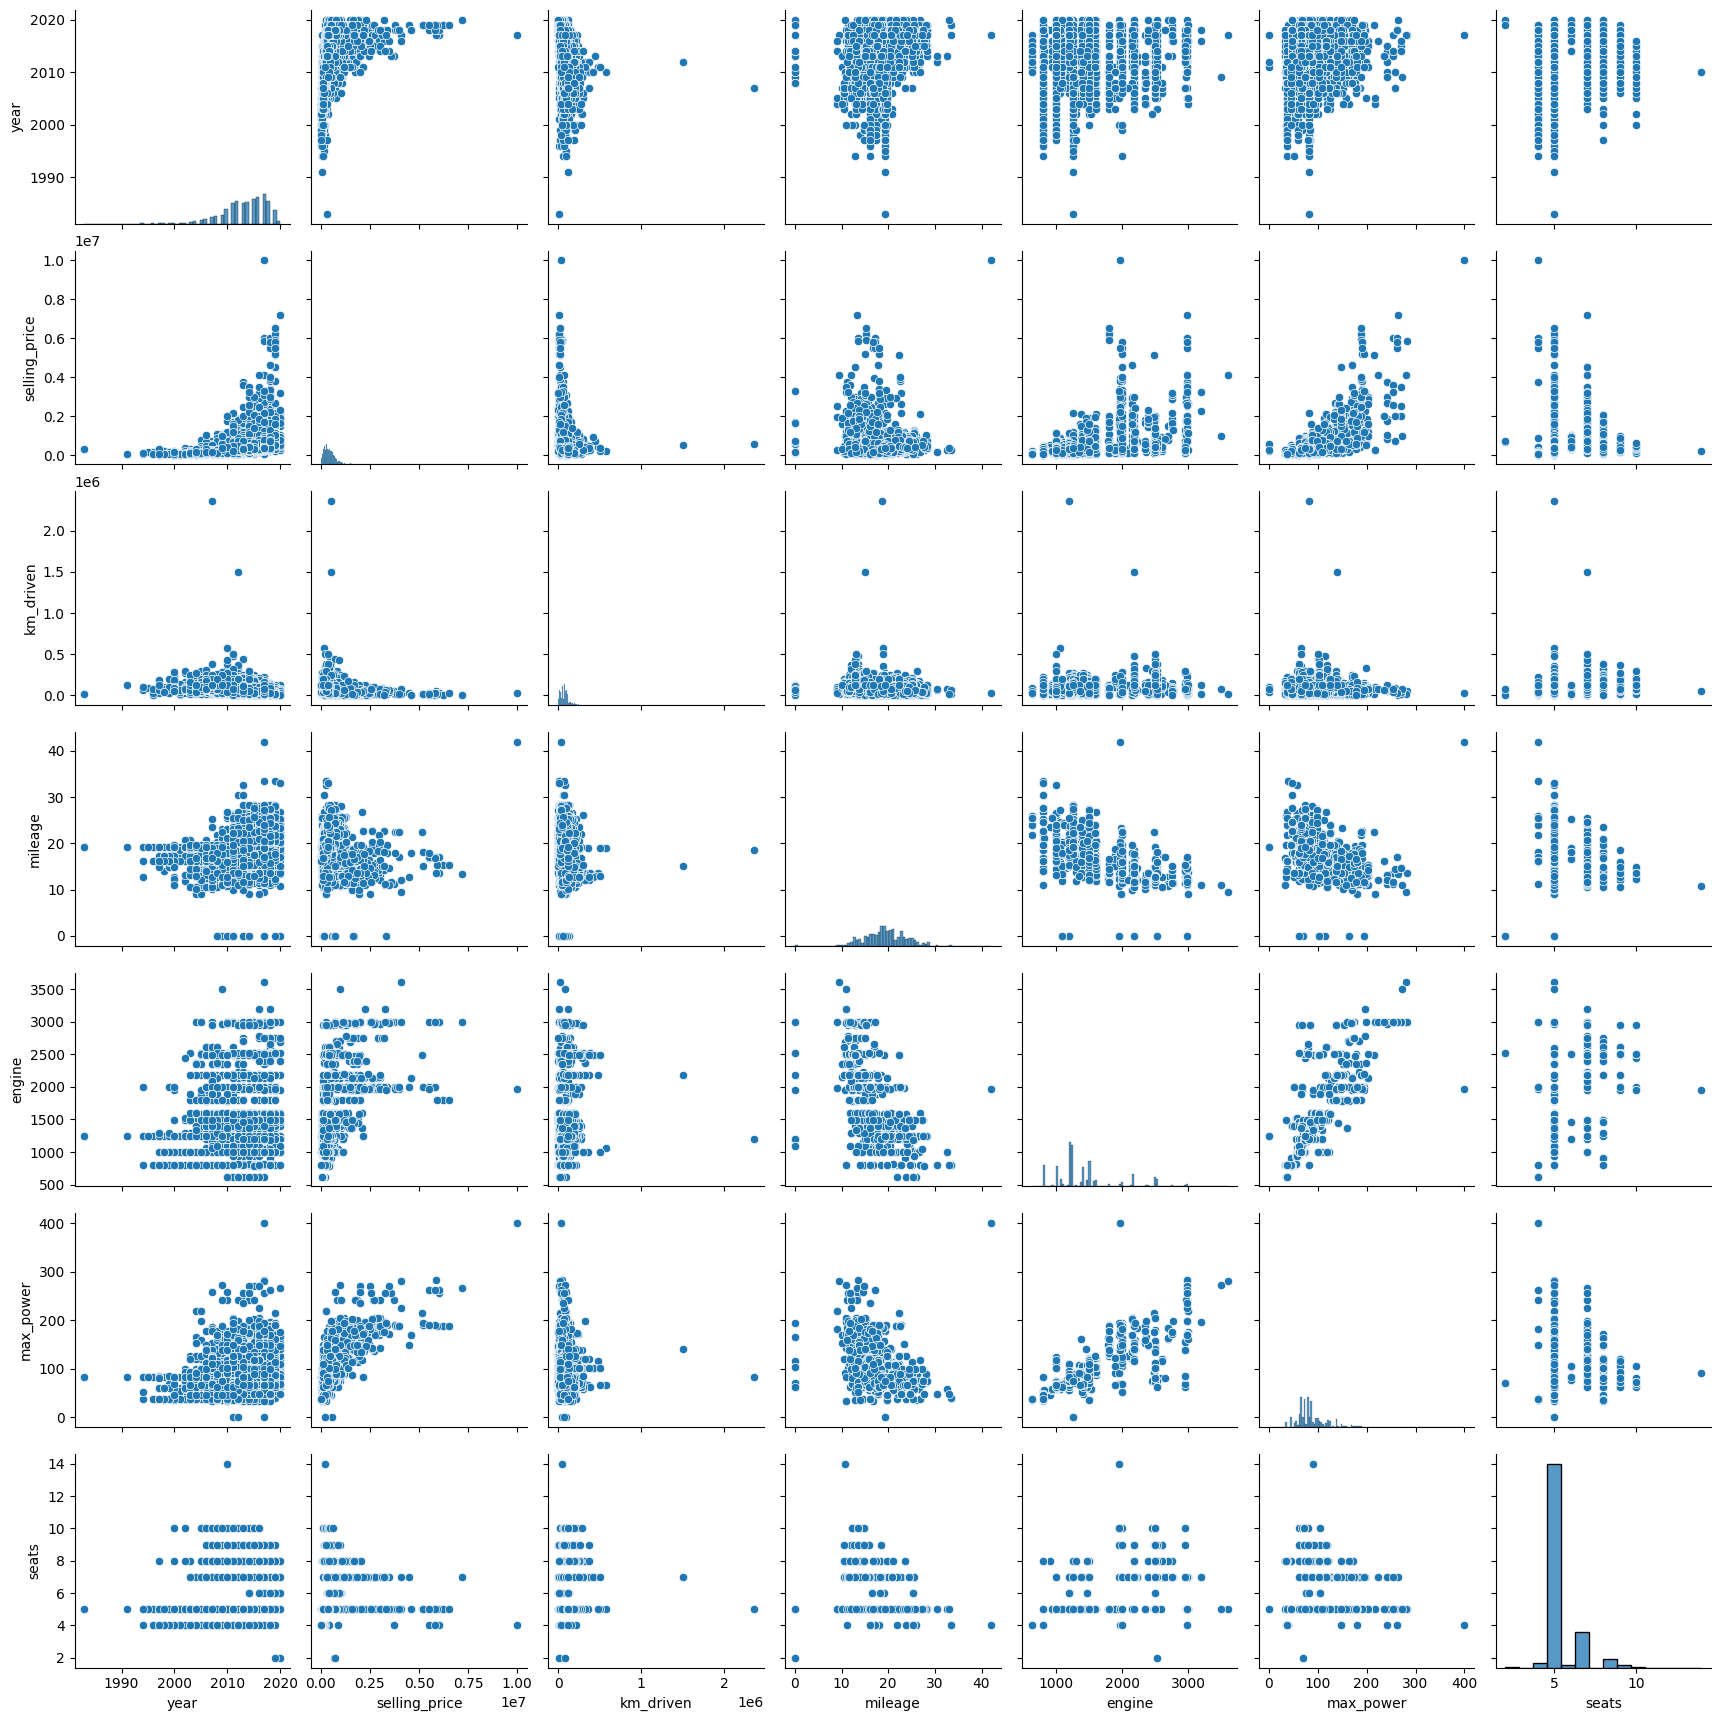

In [31]:
# your code here
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
sns.pairplot(df_train[numeric_cols])
plt.show()

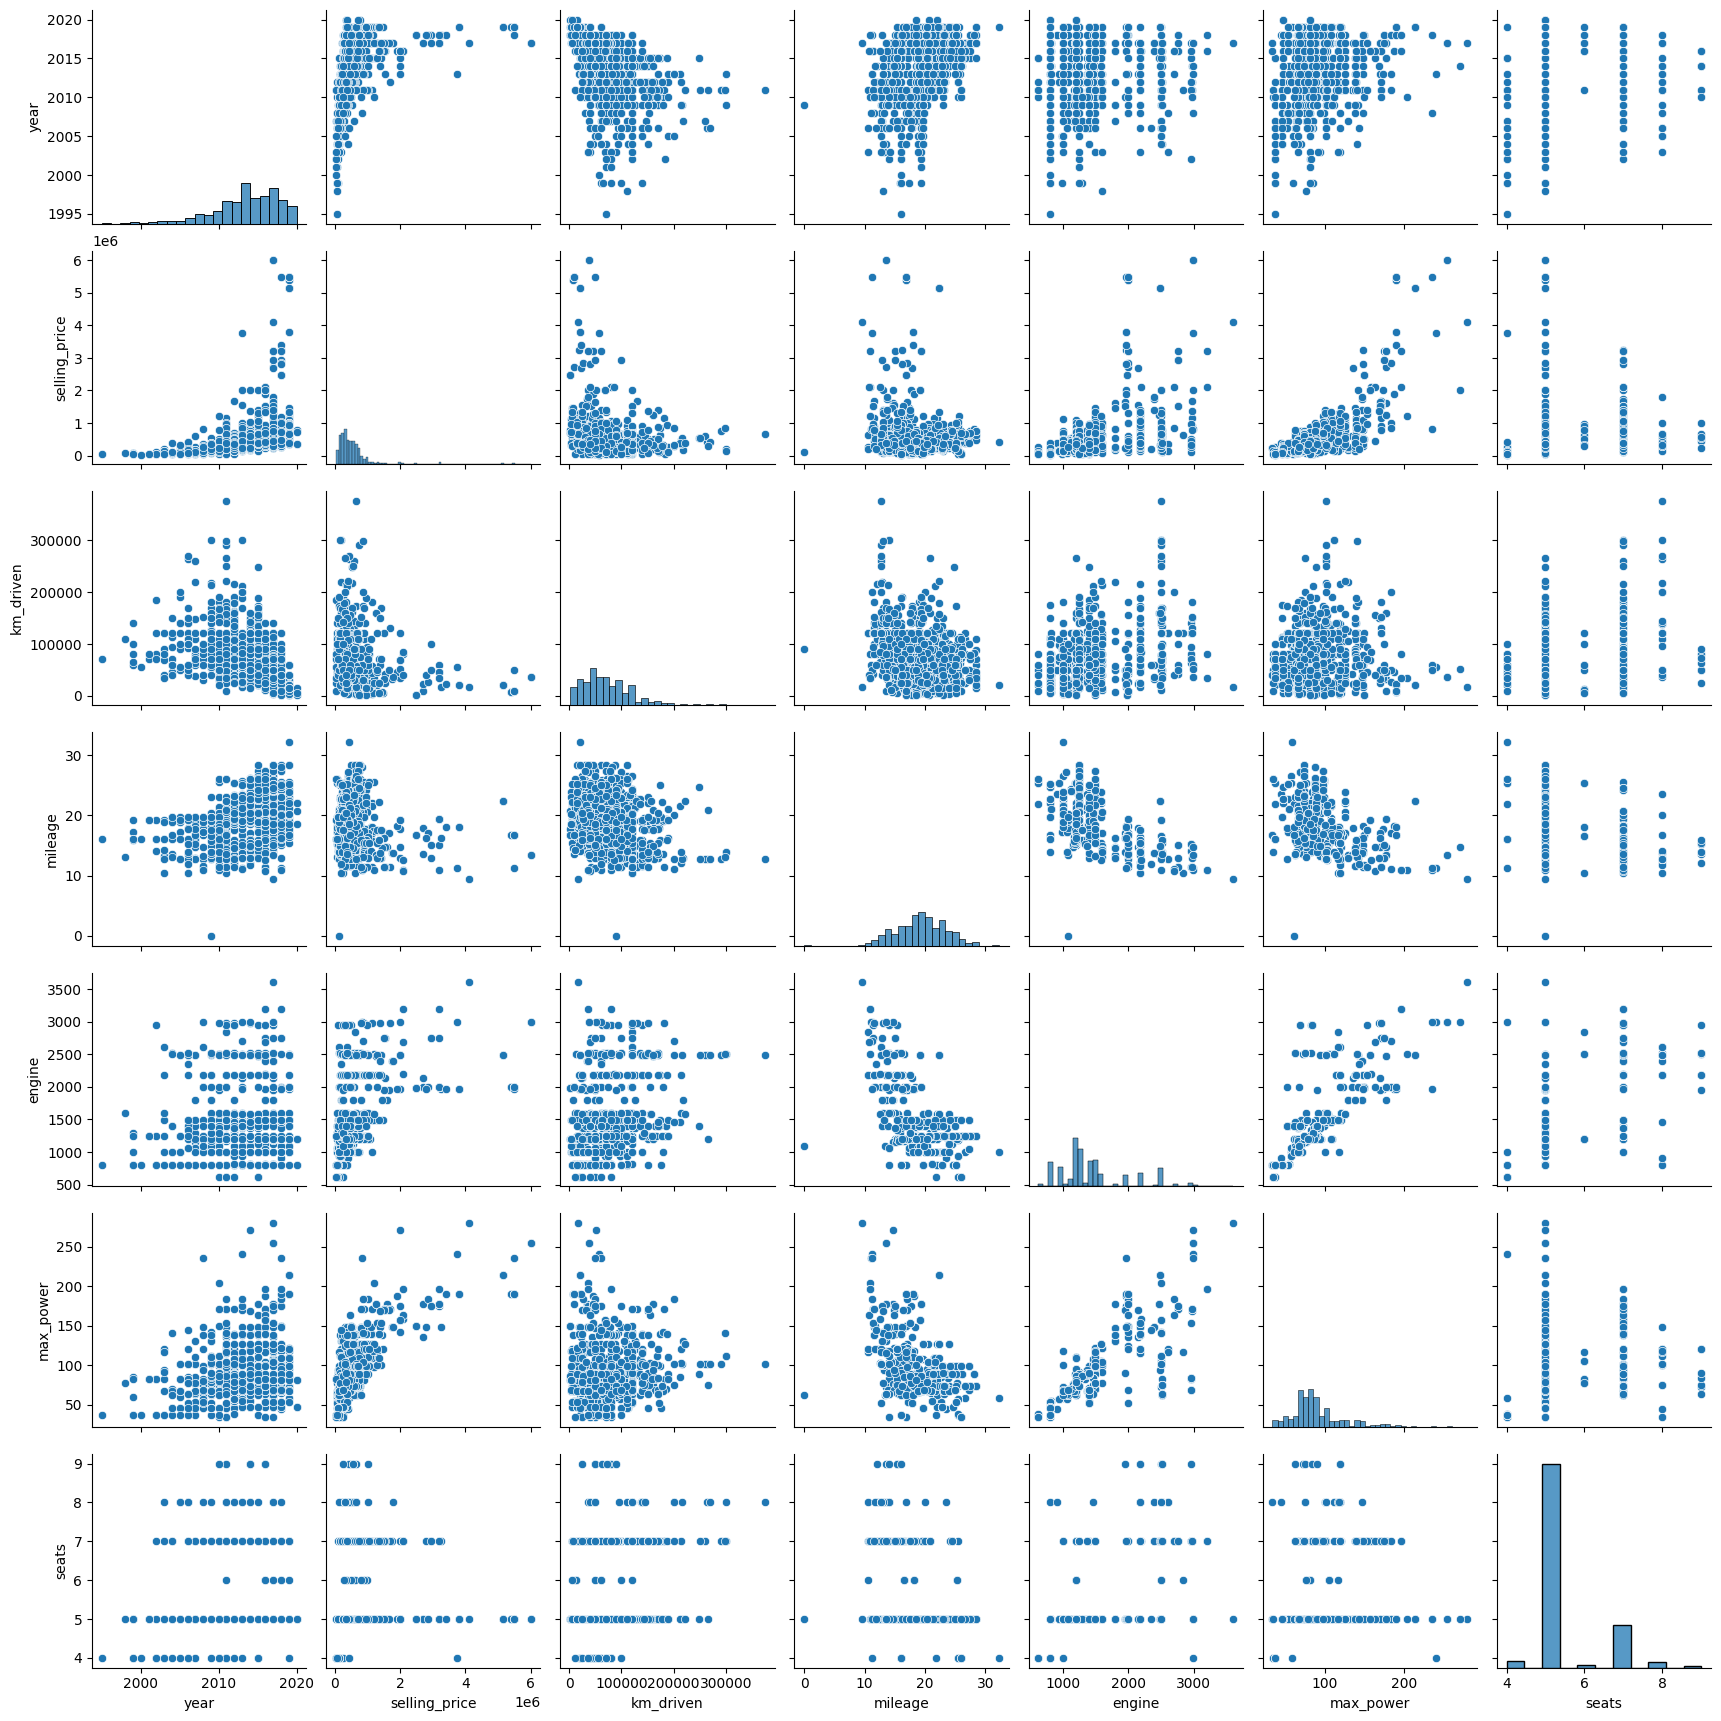

In [32]:
# your code here
numeric_cols = df_test.select_dtypes(include=[np.number]).columns.tolist()
sns.pairplot(df_test[numeric_cols]) 
plt.show()

`Your answer here`

отвечу по порядку на все вопросы

1 - Можно ли предположить связь признаков с целевой переменной?
Да, по графикам видна связь selling_price например с year (более новые автомобили дороже), engine, max_power. Связь с km_driven отрицательная (чем больше пробег, тем ниже цена).

2 - Можно ли предположить корреляции между признаками?
Можно, например между engine и max_power (больше объем двигателя - больше мощность), также заметна возможная связь year с другими признаками

3 - Похожими ли оказались совокупности при разделении на трейн и тест?
Да, визуально схожи, что ещё раз подтверждает тот факт, что данные разбились относительно корректно

### **Задание 7 (1.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [33]:
# your code here
corr_matrix = df_train[numeric_cols].corr()
corr_matrix

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.342172,0.002819,0.156648,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104458,0.447672,0.692754,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182245,0.229766,0.024630,0.192328
mileage,0.342172,-0.104458,-0.182245,1.000000,-0.572677,-0.373271,-0.450810
engine,0.002819,0.447672,0.229766,-0.572677,1.000000,0.681082,0.652172
max_power,0.156648,0.692754,0.024630,-0.373271,0.681082,1.000000,0.244060
seats,0.041178,0.149953,0.192328,-0.450810,0.652172,0.244060,1.000000


Отрисуем в seaborn

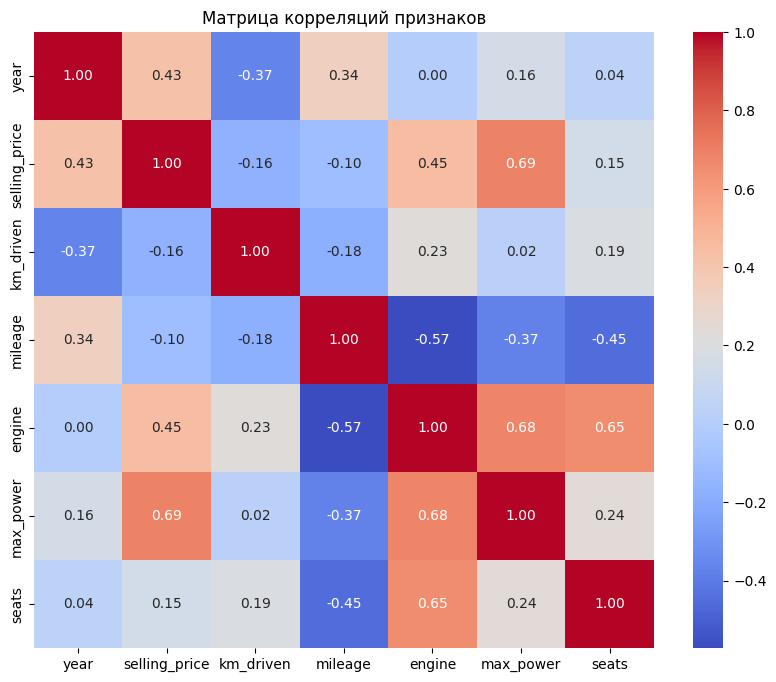

In [34]:
plt.figure(figsize=(10, 8))
# округляем до двух знаков и ставим тип coolwarm, чтобы палитра была от синей к красной
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Матрица корреляций признаков')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`

1 - Менее скоррелированными являются year и engine

2 - Наиболее сильные положительные корреляции:
selling_price и max_power: 0.69
engine и max_power: 0.68
engine и seats: 0.65

3 - нет, корреляция между year и km_driven отрицательная -0.37 те чем новее автомобиль (больше год), тем МЕНЬШЕ километров он проехал, что логично

Но опять же во всех пунктах делаем оговорку корреляция != каузация, то есть без статтестов мы не имеем права ничего явно говорить о смысловом значении корреляции

# **Часть 2 | Модель только на вещественных признаках (6.25 балла)**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.25 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [35]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

Тут я пожалуй отдельно разобью и закомменчу строки предложенные так как в примере учтены не все признаки

In [36]:
numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

df_train_numeric = df_train[numeric_features + ['selling_price']].copy()

y_train = df_train_numeric['selling_price']
X_train = df_train_numeric[numeric_features]

In [37]:
X_train.shape

(5840, 6)

In [38]:
# y_train = df_train["selling_price"].dropna()
# X_train = df_train[['year', 'km_driven', 'seats']].dropna()

In [39]:
# X_train.shape

In [40]:
%%time

for i in range(1, 100000):
    i

CPU times: user 2.6 ms, sys: 1 µs, total: 2.6 ms
Wall time: 2.6 ms


In [41]:
assert X_train.shape == (5840, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

отлично, разбилось верно чтд. теперь то же самое для теста

In [42]:
df_test_numeric = df_test[numeric_features + ['selling_price']].copy()

y_test = df_test_numeric['selling_price']
X_test = df_test_numeric[numeric_features]

In [43]:
assert X_test.shape == (1000, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

Отлично, можем строить модель

### **Задание 9 (1 балл)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here

lr = LinearRegression()
lr.fit(X_train, y_train)

# получаем предсаказания для выборок
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# тут аггрегирую результаты для трейна и теста по mse и r2
print(f'r2 для трейна {r2_score(y_train, y_train_pred)}, mse {MSE(y_train, y_train_pred)}')
print(f'r2 для теста {r2_score(y_test, y_test_pred)}, mse {MSE(y_test, y_test_pred)}')

r2 для трейна 0.5922629595849868, mse 116873067751.52184
r2 для теста 0.5941441219017103, mse 233297548204.61243


Итого мы видим достаточно низкое качество предсказаний дефольной линейной регрессии. r2 составляет всего 0.59 как на обучающей, так и на тестовой выборке, те модель объясняет всего лишь 59% дисперсии целевой переменной (цены автомобиля), обычно в продакшн такие модели не идут. При этом mse очень высока около 117 для трейна и 233 для теста а это указывает на существенные отклонения предсказаний от реальных значений

### **Задание 10 (0.75 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [45]:
from sklearn.preprocessing import StandardScaler

# your code here
# просто также применяем скейлер объявив его предварительно 
scaler = StandardScaler()
# для честности обучаем его только на трейне
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

y_train_pred_scaled = lr_scaled.predict(X_train_scaled)
y_test_pred_scaled = lr_scaled.predict(X_test_scaled)

print(f'r2 для трейна {r2_score(y_train, y_train_pred_scaled)}, mse {MSE(y_train, y_train_pred_scaled)}')
print(f'r2 для теста {r2_score(y_test, y_test_pred_scaled)}, mse {MSE(y_test, y_test_pred_scaled)}')

r2 для трейна 0.5922629595849875, mse 116873067751.52162
r2 для теста 0.5941441219017267, mse 233297548204.603


### **Задание 11 (0.5 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [46]:
# your code here
# оберну отдельно в датафрайм и отсортирую по коэффициенту
coefs = pd.DataFrame({
    'feature': numeric_features,
    'coefficient': lr_scaled.coef_,
    'abs_coefficient': np.abs(lr_scaled.coef_)
}).sort_values('abs_coefficient', ascending=False)

In [47]:
coefs

,feature,coefficient,abs_coefficient
4,max_power,322779.703236,322779.703236
0,year,152843.262358,152843.262358
3,engine,61176.857150,61176.857150
1,km_driven,-44148.047511,44148.047511
2,mileage,28781.086595,28781.086595
5,seats,-23220.570226,23220.570226


In [48]:
# самый информативный
coefs.iloc[0]

feature                max_power
coefficient        322779.703236
abs_coefficient    322779.703236
Name: 4, dtype: object

В целом, не удивительно, что мощность является одним из самых информативных признаков

### **Задание 12 (1.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [49]:
from sklearn.linear_model import Lasso

# your code here
# объявляем, обучаемся
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

# смотрим метрики
print(f'ТРЕЙН r2:{r2_score(y_train, y_train_pred_lasso)} MSE:{MSE(y_train, y_train_pred_lasso)}')
print(f'ТЕСТ r2:{r2_score(y_test, y_test_pred_lasso)} MSE:{MSE(y_test, y_test_pred_lasso)}')

ТРЕЙН r2:0.5922629595497046 MSE:116873067761.63504
ТЕСТ r2:0.5941429546560312 MSE:233298219170.76022


In [50]:
# your code here
# тут смотрим коэффициенты, для этого опять для удобства обернем все в датафрейм
lasso_coefs = pd.DataFrame({
    'feature': numeric_features,
    'coefficient': lasso.coef_
})

lasso_coefs

,feature,coefficient
0,year,152843.083853
1,km_driven,-44146.918538
2,mileage,28779.204085
3,engine,61172.025780
4,max_power,322780.586197
5,seats,-23217.693273


In [51]:
#проверим есть ли зануленные коэффициенты
zeros = (lasso.coef_ == 0).sum()
zeros

np.int64(0)

Итого Lasso с параметром alpha=1 не улучшила качество предсказаний (r2 так и остался в пределе 0.59), но зато показала, что все признаки являются значимыми, ни один коэффициент не обнулился

### **Задание 13 Финальный рывок (2.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [52]:
%%time
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# your code here
# задаем логарифмическую сетку
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# гридсерч на 10 фолдах
lasso_cv = GridSearchCV(Lasso(), param_grid_lasso, cv=10, scoring='r2')
lasso_cv.fit(X_train_scaled, y_train)

# лучшие параметры
print(lasso_cv.best_params_)
# лучший R2
print(lasso_cv.best_score_)


{'alpha': 1000}
0.5689041850859416
CPU times: user 228 ms, sys: 4.35 ms, total: 232 ms
Wall time: 117 ms


In [53]:
# Количество обученных моделей
total_models = len(param_grid_lasso['alpha']) * 10
total_models

70

In [54]:
# лучшая модель
best_lasso = lasso_cv.best_estimator_
y_train_pred_best = best_lasso.predict(X_train_scaled)
y_test_pred_best = best_lasso.predict(X_test_scaled)

print(f"r2: {r2_score(y_train, y_train_pred_best)}, MSE: {MSE(y_train, y_train_pred_best):.2f}")
print(f"r2: {r2_score(y_test, y_test_pred_best)}, MSE: {MSE(y_test, y_test_pred_best):.2f}")

r2: 0.5922285941618449, MSE: 116882918199.31
r2: 0.5929630205883187, MSE: 233976478966.65


In [55]:
# your code here
# провери веса на занулённость
best_lasso_coefs = pd.DataFrame({
    'feature': numeric_features,
    'coefficient': best_lasso.coef_
})

print(best_lasso_coefs)

zero_coefs = best_lasso_coefs[best_lasso_coefs['coefficient'] == 0]
print(f'зануленных весов {zero_coefs.shape[0]}')

# также я хочу еще раз глянуть важнейшие признаки в отсортированном формате по модулю
important_features = best_lasso_coefs[best_lasso_coefs['coefficient'] != 0].sort_values('coefficient', key=abs, ascending=False)
print(important_features)

     feature    coefficient
0       year  152628.836894
1  km_driven  -43041.283085
2    mileage   26958.135423
3     engine   56434.958908
4  max_power  323638.478256
5      seats  -20363.465028
зануленных весов 0
     feature    coefficient
4  max_power  323638.478256
0       year  152628.836894
3     engine   56434.958908
1  km_driven  -43041.283085
2    mileage   26958.135423
5      seats  -20363.465028


Итого, ничего не занулилось, но есть проблема с потерей качества. Обычно на этом этапе стоит задуматься о скоррелированности некоторых индикаторов выявленной ранее и как-то отнормировать их, либо добавлять новые предикторы в том числе категоральные. тут уже видно что если классическая линейная регрессия не справляется, то и другие модели тоже очень вряд ли будут хорошо работать)))

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [56]:
from sklearn.linear_model import ElasticNet

# your code here
param_grid_elastic = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

elastic_cv = GridSearchCV(ElasticNet(), param_grid_elastic, cv=10, scoring='r2')
elastic_cv.fit(X_train_scaled, y_train)

print(f'лучшие параметры для ElasticNet: { elastic_cv.best_params_}')
print(f'лучший r2: {elastic_cv.best_score_}')

total_models_elastic = len(param_grid_elastic['alpha']) * len(param_grid_elastic['l1_ratio']) * 10
print(f'кол-во обученных моделек {total_models_elastic}')

# метрики для лучшей модельки
best_elastic = elastic_cv.best_estimator_
y_train_pred_elastic = best_elastic.predict(X_train_scaled)
y_test_pred_elastic = best_elastic.predict(X_test_scaled)

print(f'r2 лучшей модели: {r2_score(y_train, y_train_pred_elastic):.4f}, MSE: {MSE(y_train, y_train_pred_elastic):.2f}')
print(f'r2 лучшей модели: {r2_score(y_test, y_test_pred_elastic):.4f}, MSE: {MSE(y_test, y_test_pred_elastic):.2f}')

лучшие параметры для ElasticNet: {'alpha': 1, 'l1_ratio': 0.9}
лучший r2: 0.5761378555173832
кол-во обученных моделек 250
r2 лучшей модели: 0.5884, MSE: 117992231505.22
r2 лучшей модели: 0.5722, MSE: 245892672007.80


ElasticNet с параметрами alpha=1 и l1_ratio=0.9 в целом показал результаты, сопоставимые с чистым Lasso: r2 0.588 на трейне и 0.572 на тесте, что подтверждает оптимальность сильной l1-регуляризации, а вот добавление 10% риджа не привело к заметному улучшению, поэтому проблема мультиколлинеарности скорее всего тут не является критической, а качество модели может быть просто ограничено линейной природой алгоритма

# **Часть 3| Добавляем категориальные фичи (3.75 балла)**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.5 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
1. Удалить столбец`name`
2. Снова объединить категориальные с вещественными признаками.

In [57]:
# your code here
# удаляем столбец
df_train = df_train.drop('name', axis=1)
df_test = df_test.drop('name', axis=1)

# делаем промежуточную табличку
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
all_features = numeric_features + categorical_cols

# склеиваем
X_train_full = df_train[all_features].copy()
y_train_full = df_train['selling_price'].copy()

X_test_full = df_test[all_features].copy()
y_test_full = df_test['selling_price'].copy()

### **Задание 15 (2 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [58]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

cols_to_encode = categorical_cols + ['seats']
numeric_only = [col for col in numeric_features if col != 'seats']

# выкидываем первый признак как по инструкции)
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder.fit(X_train_full[cols_to_encode])

X_train_encoded = encoder.transform(X_train_full[cols_to_encode])
X_test_encoded = encoder.transform(X_test_full[cols_to_encode])

encoded_feature_names = encoder.get_feature_names_out(cols_to_encode)

# тут объединяем горизонтально
X_train_final = np.hstack([X_train_full[numeric_only].values, X_train_encoded])
X_test_final = np.hstack([X_test_full[numeric_only].values, X_test_encoded])

print(X_train_final.shape)
print(X_test_final.shape)

(5840, 23)
(1000, 23)


Супер! добавились новые фичи, скорее всего из-за кол-ва сидений размер большой

### **Задание 16 (1.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
scaler_full = StandardScaler()
X_train_final_scaled = scaler_full.fit_transform(X_train_final)
X_test_final_scaled = scaler_full.transform(X_test_final)

param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge_cv = GridSearchCV(Ridge(), param_grid_ridge, cv=10, scoring='r2')
ridge_cv.fit(X_train_final_scaled, y_train_full)

print(f'лучшие параметры риджа {ridge_cv.best_params_}')
print(f'лучший r2 {ridge_cv.best_score_}')

лучшие параметры риджа {'alpha': 1000}
лучший r2 0.6207827525968672


Итого, видим заметное но небольшое улучшение рквадрата теперь глянем на трейне и тесте

In [60]:
best_ridge = ridge_cv.best_estimator_
y_train_pred_ridge = best_ridge.predict(X_train_final_scaled)
y_test_pred_ridge = best_ridge.predict(X_test_final_scaled)

print(f'метрики на трейне. r2: {r2_score(y_train_full, y_train_pred_ridge)}, mse: {MSE(y_train_full, y_train_pred_ridge)}')
print(f'метрики на трейне. r2: {r2_score(y_test_full, y_test_pred_ridge)}, mse: {MSE(y_test_full, y_test_pred_ridge)}')

метрики на трейне. r2: 0.657848304641705, mse: 98073793423.83551
метрики на трейне. r2: 0.6028602151068037, mse: 228287288936.7186


Итоговый вывод onehot encoding переменной кол-ва сидений в сочетании с риджем привело к заметному улучшению качества модели, видим что r2 увеличился до 0.66 на трейне и 0.60 на тесте. Следовательно категориальная природа признака seats была важна, а наша регрессия более эффективно обработала увеличенное пространство признаков благодаря регуляризации

# **Часть 4 (7 баллов) | Классификация**



In [61]:
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [62]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### **Задание 13 (2 балла)**
Обучите логистическую регрессию на синтетических данных.

In [63]:
# your code here
# импортируем сразу как библиотеку так и основные скоры в которые будем использовать в этой задаче
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

y_train_pred_logreg = logreg.predict(X_train)
y_test_pred_logreg = logreg.predict(X_test)

Отдельно выведу ниже для трейна и для теста

In [64]:
print('train')
print(f'Accuracy: {accuracy_score(y_train, y_train_pred_logreg)}')
print(f'Precision: {precision_score(y_train, y_train_pred_logreg)}')
print(f'Recall: {recall_score(y_train, y_train_pred_logreg)}')
print(f'F1: {f1_score(y_train, y_train_pred_logreg)}')

train
Accuracy: 0.8493428571428572
Precision: 0.8505269790353992
Recall: 0.8479042941982641
F1: 0.8492136116671433


In [65]:
print('test')
print(f'Accuracy: {accuracy_score(y_test, y_test_pred_logreg)}')
print(f'Precision: {precision_score(y_test, y_test_pred_logreg)}')
print(f'Recall: {recall_score(y_test, y_test_pred_logreg)}')
print(f'F1: {f1_score(y_test, y_test_pred_logreg)}')

test
Accuracy: 0.8486666666666667
Precision: 0.849496981891348
Recall: 0.8465445796016575
F1: 0.848018211033744


В целом видим неплохие показатели на бейзлайне, но это пока не повод радоваться

На тестовой части посчитайте ROC-AUC, PR-AUC. Самостоятельно изучите, что такое PR-AUC.

Постройте ROC и PR кривые. Проинтерпретируйте результат.

In [66]:
# your code here
from sklearn.metrics import roc_curve, precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt

# получаем вероятности для положительного класса
y_test_proba = logreg.predict_proba(X_test)[:, 1]

# вычисляем метрики
roc_auc = roc_auc_score(y_test, y_test_proba)
pr_auc = average_precision_score(y_test, y_test_proba)

# выводим мтерики
print(f'ROC-AUC: {roc_auc}')
print(f'PR-AUC: {pr_auc}')

ROC-AUC: 0.9259023377910034
PR-AUC: 0.9249757664368783


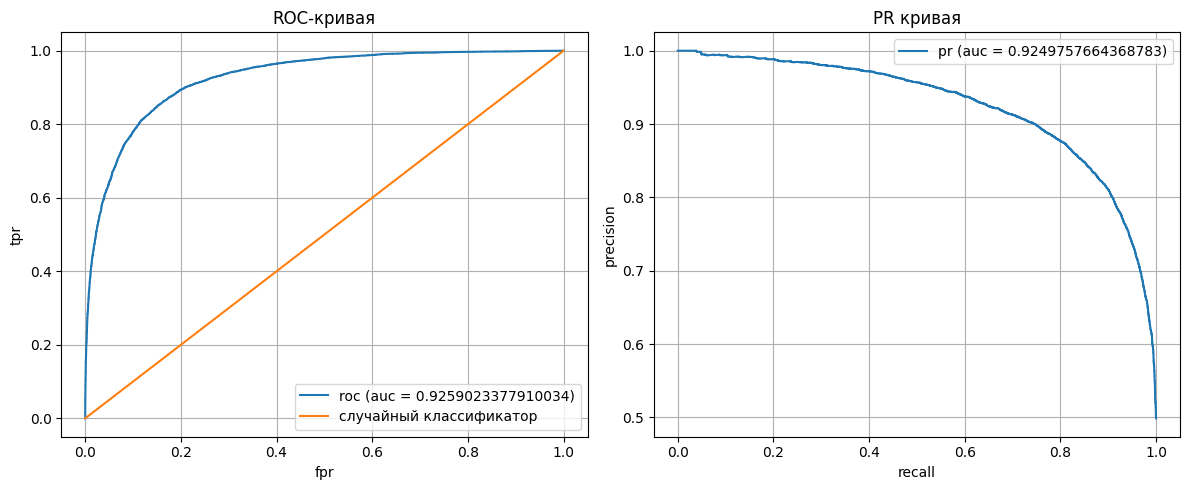

In [67]:
# нам также важно получить метрики tp fp и precision и recall
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)

# создаем графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ниже поясню по действиям что для чего делаю для одного графика, для второго почти та же логика
# ROC кривая
# тут объяляю две строчки для того чтобы подписать наименования кривых рок аук и случайного классификатора
ax1.plot(fpr, tpr, label=f'roc (auc = {roc_auc})')
ax1.plot([0, 1], [0, 1], label='случайный классификатор')
# именуем оси
ax1.set_xlabel('fpr')
ax1.set_ylabel('tpr')
# общее название
ax1.set_title('ROC-кривая')
# ставим что показываем легенду и оставляем сетку, обычно на таких графиках принято её оставлять
ax1.legend()
ax1.grid(True)

# PR кривая
ax2.plot(recall, precision, label=f'pr (auc = {pr_auc})')
ax2.set_xlabel('recall')
ax2.set_ylabel('precision')
ax2.set_title('PR кривая')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

Итак интерпретация

Во первых, сами две метрики высокие, что очень хорошо, но стоит понимать, что это делалось на синтетике

ROC-кривая:

1 - так как кривая резко уходит вверх от начала координат модель быстро находит tp примеры что очень круто

2 - модель значительно лучше случайного классификатора, именно так называют обычно вторую диагональную кривую

3 - при fpr 0.2 модель уже достигает trp 0.85 что говорит что у нас отличная чувствительность

PR-кривая:

1 - сразу начинается с высокой точности 1.0, те при высоких порогах модель почти не ошибается

2 - хороший баланс между пресижном и реколлом так как плавно снижается

3 - площадь под кривой 0.925 тоже очень хороший показатель! в будущем это поможет бороться с дисбалансом классов если что-то ещё планируется добавлять

### **Задание 14 (2 балла)**

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка train). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет. (Датасет в чате ТГ)

In [ ]:
data = pd.read_csv('data/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

У вас немного странный шафлинг, random_state 124 хотя вроде как условились что 42, далее чтобы не было путаницы ещё раз глобально объявлю что он равен 42 и обучаться также буду на нем

In [69]:
RANDOM_STATE = 42

Посчитайте качество (выведите все метрики классификации) на train и test при применении логистической регрессии.

In [ ]:
import pandas as pd 
data = pd.read_csv('data/train.csv', index_col=0)


In [71]:
data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [72]:
# сюда импортирую клас репорта для того, чтобы нам в удобном формате сразу шли результаты
from sklearn.metrics import classification_report

# создаем и обучаем модель
logreg_porto = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
logreg_porto.fit(X_train, y_train)

# предс)
y_train_pred_porto = logreg_porto.predict(X_train)
y_test_pred_porto = logreg_porto.predict(X_test)

In [73]:
# отчет для трейна
print('train')
print(classification_report(y_train, y_train_pred_porto))
print(f'ROC-AUC: {roc_auc_score(y_train, logreg_porto.predict_proba(X_train)[:, 1])}')

# для теста
print('test')
print(classification_report(y_test, y_test_pred_porto))
print(f'ROC-AUC: {roc_auc_score(y_test, logreg_porto.predict_proba(X_test)[:, 1])}')

train
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    458796
           1       0.00      0.00      0.00     17373

    accuracy                           0.96    476169
   macro avg       0.48      0.50      0.49    476169
weighted avg       0.93      0.96      0.95    476169

ROC-AUC: 0.6220008014670892
test
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114722
           1       0.00      0.00      0.00      4321

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043

ROC-AUC: 0.6272724722135109


Итак результат в лоб, видим что модель де факто вообще не работоспособна. она нормально предсказывает только класс 0 и игнорирует класс 1. Высокий общий accuracy 96% врет из-за дисбаланса классов, на самом деле модель работает чуть лучше сулчайного классификатора. roc-auc как раз это подтверждает

### **Задание 15 (2 балла)**

Закодируйте все категориальные признаки с помощью one-hot-кодирования, а числовые признаки масштабируйте. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до предобработки). Измерьте время, потребовавшееся на обучение модели. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [74]:
# сперва разделим признаки
cat_features = [col for col in X_train.columns if 'cat' in col]
bin_features = [col for col in X_train.columns if 'bin' in col]
num_features = [col for col in X_train.columns if col not in cat_features and col not in bin_features]

print(f'категориальные: {len(cat_features)}')
print(f'бинарные: {len(bin_features)}') 
print(f'числовые: {len(num_features)}')
print(f'всего исходно {X_train.shape[1]}')

категориальные: 14
бинарные: 17
числовые: 26
всего исходно 57


In [75]:
# ohe для категориальных
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_cat_encoded = encoder.fit_transform(X_train[cat_features])
X_test_cat_encoded = encoder.transform(X_test[cat_features])

# масштабируем числовые
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_features])
X_test_num_scaled = scaler.transform(X_test[num_features])

# также горизонтально объединяем как я показывал в прошлых ячейках
X_train_processed = np.hstack([X_train_num_scaled, X_train[bin_features].values, X_train_cat_encoded])
X_test_processed = np.hstack([X_test_num_scaled, X_test[bin_features].values, X_test_cat_encoded])

# сколько получилось признаков после предобработки
X_train_processed.shape[1]

213

Далее уже полноценно переходим к обучению

In [76]:
import time
# засекаем время
start_time = time.time()

# объявляем логрег и обучаемся
model = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
model.fit(X_train_processed, y_train)

# сколько понадобилось (дифф времени)
training_time = time.time() - start_time

# сохраняем предсказания
y_train_pred = model.predict(X_train_processed)
y_test_pred = model.predict(X_test_processed)

In [77]:
training_time

1.4692401885986328

1 секунда - быстро! теперь смотрим отчеты

In [78]:
print('train')
print(classification_report(y_train, y_train_pred))
print(f'ROC-AUC: {roc_auc_score(y_train, model.predict_proba(X_train_processed)[:, 1])}')

print('test')
print(classification_report(y_test, y_test_pred))
print(f'ROC-AUC: {roc_auc_score(y_test, model.predict_proba(X_test_processed)[:, 1])}')

train
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    458796
           1       0.00      0.00      0.00     17373

    accuracy                           0.96    476169
   macro avg       0.48      0.50      0.49    476169
weighted avg       0.93      0.96      0.95    476169

ROC-AUC: 0.6330804082726114
test
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114722
           1       0.00      0.00      0.00      4321

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043

ROC-AUC: 0.6378109914164538


в общем дифф совершенно небольшой. всего лишь +1% roc-auc. а модель все так же не предсказывает 1. в общем, здесь это никак не поможет, можно хоть все фичи проинженерить, если модель видит что ей выгодно всегда предсказывать 0 она будет делать именно так. попробую накинуть smote и посмотреть что изменится. Если что смоут это достаточно неплохой способ побороть дисбаланс, хотя не самый идеальный. Обычно в индустрии при базовых настройках моделек и отладке его часто применяют

In [79]:
import time
# засекаем время
start_time = time.time()

# объявляем логрег и обучаемся ДОБАВИЛ CLASS_WEIGHT
model = LogisticRegression(class_weight='balanced',max_iter=1000, random_state=RANDOM_STATE)
model.fit(X_train_processed, y_train)

# сколько понадобилось (дифф времени)
training_time = time.time() - start_time

# сохраняем предсказания
y_train_pred = model.predict(X_train_processed)
y_test_pred = model.predict(X_test_processed)

In [80]:
training_time

5.467437028884888

In [81]:
print('train')
print(classification_report(y_train, y_train_pred))
print(f'ROC-AUC: {roc_auc_score(y_train, model.predict_proba(X_train_processed)[:, 1])}')

print('test')
print(classification_report(y_test, y_test_pred))
print(f'ROC-AUC: {roc_auc_score(y_test, model.predict_proba(X_test_processed)[:, 1])}')

train
              precision    recall  f1-score   support

           0       0.97      0.63      0.77    458796
           1       0.05      0.56      0.10     17373

    accuracy                           0.63    476169
   macro avg       0.51      0.60      0.43    476169
weighted avg       0.94      0.63      0.74    476169

ROC-AUC: 0.634624831633891
test
              precision    recall  f1-score   support

           0       0.97      0.63      0.77    114722
           1       0.05      0.57      0.10      4321

    accuracy                           0.63    119043
   macro avg       0.51      0.60      0.43    119043
weighted avg       0.94      0.63      0.74    119043

ROC-AUC: 0.6378595678366501


В общем, smote немного улучшил работу, потому что искусственно уравнял распределение классов и модель перестала игнорировать меньший класс и соответственно начала находить 56% позитивных случаев вместо 0%. Однако precision остался низким (всего 5%) потому что появилось много fp срабатываний. собственно это типичный компромисс при борьбе с дисбалансом

### **Задание 16 (1 балла)**

Давайте попробуем использовать SGDClassifier для улучшения качества модели. Улучшились ли метрики и качество в целом на трейне и тесте? Используйте GreedSearchCV

In [82]:
# your code here

In [83]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# параметры для GridSearch
param_grid = {
    'loss': ['log_loss', 'modified_huber'],
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'l1', 'elasticnet'],
    #добавил веса для борьбы с дисбалансом
    'class_weight': ['balanced', None]
}

# GridSearch с кросс-валидацией
sgd_cv = GridSearchCV(
    SGDClassifier(max_iter=1000, random_state=RANDOM_STATE),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
# запускаемся
sgd_cv.fit(X_train_processed, y_train)

# лучшая модель
best_sgd = sgd_cv.best_estimator_

# предсказания
y_train_pred_sgd = best_sgd.predict(X_train_processed)
y_test_pred_sgd = best_sgd.predict(X_test_processed)

training_time = time.time() - start_time


Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [84]:

print(f'обучались по времени {training_time}')
print(f'лучшие параметры: {sgd_cv.best_params_}')
print(f'лучший ROC-AUC: {sgd_cv.best_score_}')


print('РЕЗУЛЬТАТЫ НА ТРЕЙНЕ')
print(classification_report(y_train, y_train_pred_sgd))
print(f"ROC-AUC: {roc_auc_score(y_train, best_sgd.predict_proba(X_train_processed)[:, 1])}")

print('РЕЗУЛЬТАТЫ НА ТЕСТЕ')
print(classification_report(y_test, y_test_pred_sgd))
print(f"ROC-AUC: {roc_auc_score(y_test, best_sgd.predict_proba(X_test_processed)[:, 1])}")

обучались по времени 357.34986686706543
лучшие параметры: {'alpha': 0.01, 'class_weight': 'balanced', 'loss': 'log_loss', 'penalty': 'l2'}
лучший ROC-AUC: 0.6264599971845694
РЕЗУЛЬТАТЫ НА ТРЕЙНЕ
              precision    recall  f1-score   support

           0       0.97      0.60      0.74    458796
           1       0.05      0.58      0.10     17373

    accuracy                           0.60    476169
   macro avg       0.51      0.59      0.42    476169
weighted avg       0.94      0.60      0.72    476169

ROC-AUC: 0.6296101385699198
РЕЗУЛЬТАТЫ НА ТЕСТЕ
              precision    recall  f1-score   support

           0       0.98      0.60      0.74    114722
           1       0.05      0.60      0.10      4321

    accuracy                           0.60    119043
   macro avg       0.51      0.60      0.42    119043
weighted avg       0.94      0.60      0.72    119043

ROC-AUC: 0.6373199943559364


Срезюмируем

### Итоговый вывод по задаче
В целом, результаты не удивительны) 

Можно сколь угодно натренировывать нашу модель самыми изощренными способами, но когда у нас в трейн датасете всего ~3.7% данных отвечает за 1 класс, а остальные характеризуют другой, очень сложно обучить хороший классификатор как я уже говорил ранее.

ROC-AUC 0.62-0.63 говорит о том что модель также чуть лучше работает чем случайное угадывание, она хорошо научилась предсказывать класс 0 а другой класс нет

И соотвтетственно пресижн для второго класса как раз подтверждает нашу гипотезу. всего 5% класса предсказывается моделькой верно

Вообще решить эту проблему можно к примеру использовав другие метрики. Хоть у нас такой постановки задачи не было я могу точно сказать что тут хорошо будет применить balanced_accuracy_score, его идея грубо говоря в том чтобы по каждому классу найти какая доля объектов каждого класса была верно классифицирована, а потом эти доли усреднить. А также стоило бы более фундаментально подойи к разделению признаков, повыделять их важности к примеру есть очень хорошая библиотека shap. ну и есть куча других методов которые нам нет смысла затрагивать в данной работе

Но как мне кажется важный вывод этой работы и то что хотелось донести нам, что какой бы нетривиальный способ вы не применяли, если ваши данные низкого качества и вы заранее не сделали хороший пайплайн обработки и не выбрали метрики которые хорошо вписываются в характер данных, качественного результата будет добиться в разы сложнее можно сказать что такой шанс почти равен нулю.

Спасибо за интересные задания!

ДЗ в репозитории https://github.com/Jentlebright/homeworks_python_sociology